In [17]:
!pip install alt-profanity-check
from profanity_check import predict, predict_prob

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import os
from sshtunnel import SSHTunnelForwarder
import numpy as np
import pandas as pd

In [2]:
MONGO_HOST = "193.196.55.231"
MONGO_DB = "twitter_db"
MONGO_USER = "LOGIN"
MONGO_PASS = "PASSWORD"

server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_username="ubuntu",
    ssh_pkey="/home/tobias/.ssh/ghost_id_rsa",
    remote_bind_address=('127.0.0.1', 27017)
)

server.start()

client = MongoClient('127.0.0.1', server.local_bind_port) # server.local_bind_port is assigned local port
db = client[MONGO_DB]


In [3]:
data = db.cc_tweets.find({}, {"text": 1, "seed" : 1, "possibly_sensitive": 1})
df = pd.DataFrame(list(data))

In [8]:
sensitive = df.loc[df.possibly_sensitive == True]

In [28]:
profanity = 0
for i, el in enumerate(df.text):
    if i % 5000 == 0 and i != 0:
        print(f"Profantiy words: {profanity} from a total of {i} tweets. Ratio: {profanity/i}")
    i += 1
    if predict([el]) == 1:
        profanity += 1
print(f"Profantiy words: {profanity} from a total of {i} tweets. Ratio: {profanity/i}")

Profantiy words: 978 from a total of 5000 tweets. Ratio: 0.1956
Profantiy words: 1866 from a total of 10000 tweets. Ratio: 0.1866
Profantiy words: 2566 from a total of 15000 tweets. Ratio: 0.17106666666666667
Profantiy words: 3082 from a total of 20000 tweets. Ratio: 0.1541
Profantiy words: 3685 from a total of 25000 tweets. Ratio: 0.1474
Profantiy words: 4223 from a total of 30000 tweets. Ratio: 0.14076666666666668
Profantiy words: 4848 from a total of 35000 tweets. Ratio: 0.1385142857142857
Profantiy words: 5479 from a total of 40000 tweets. Ratio: 0.136975
Profantiy words: 6119 from a total of 45000 tweets. Ratio: 0.13597777777777778
Profantiy words: 6746 from a total of 50000 tweets. Ratio: 0.13492
Profantiy words: 7439 from a total of 55000 tweets. Ratio: 0.13525454545454546
Profantiy words: 8133 from a total of 60000 tweets. Ratio: 0.13555
Profantiy words: 8863 from a total of 65000 tweets. Ratio: 0.13635384615384616
Profantiy words: 9580 from a total of 70000 tweets. Ratio: 0.13

Profantiy words: 83355 from a total of 530000 tweets. Ratio: 0.15727358490566037
Profantiy words: 85675 from a total of 535000 tweets. Ratio: 0.16014018691588786
Profantiy words: 85851 from a total of 540000 tweets. Ratio: 0.15898333333333334
Profantiy words: 86149 from a total of 545000 tweets. Ratio: 0.15807155963302752
Profantiy words: 86364 from a total of 550000 tweets. Ratio: 0.15702545454545455
Profantiy words: 86367 from a total of 550087 tweets. Ratio: 0.15700607358472388


## Too much time

In [32]:
data = db.cc_tweets.find({"author_id": "18610633"}, {"text": 1, "seed" : 1, "author_id": 1, "created_at" :1 })

In [33]:
df_data = pd.DataFrame(list(data))

In [34]:
df_data

,_id,text,created_at,author_id,seed
0,61e71dc81d4d4f3c2be4d9f4,@bode_e @maaralaaaros @JoanneK39 @sunflwgrange...,2020-06-07T10:29:01.000Z,18610633,1269382518362509313
1,61e71de41d4d4f3c2be4e363,@MaddieGillespi3 @djgordy @zaelefty @quelizinh...,2020-06-07T09:13:26.000Z,18610633,1269382518362509313
2,61e71de91d4d4f3c2be4e529,@bode_e @maaralaaaros @JoanneK39 @sunflwgrange...,2020-06-07T08:57:17.000Z,18610633,1269382518362509313
3,61e71dec1d4d4f3c2be4e638,@EvaPoen @AudreySuffolk @jk_rowling This retwe...,2020-06-07T08:47:30.000Z,18610633,1269382518362509313
4,61e71e151d4d4f3c2be4f3b0,@maaralaaaros @JoanneK39 @sunflwgranger @heath...,2020-06-07T06:42:41.000Z,18610633,1269382518362509313
...,...,...,...,...,...
1292,61e83de41d4d4f3c2bed4e61,@starofstage The likes disappear in their 0000...,2021-01-31T10:57:38.000Z,18610633,1269389298664701952
1293,61e85f9b1d4d4f3c2bedb16f,"RT @jk_rowling: ‘Feminazi’, ‘TERF’, ‘bitch’, ‘...",2021-02-28T20:19:03.000Z,18610633,1269389298664701952
1294,61e85fd91d4d4f3c2bedc711,"RT @jk_rowling: ‘Feminazi’, ‘TERF’, ‘bitch’, ‘...",2020-06-07T06:46:12.000Z,18610633,1269389298664701952
1295,61e9288f2b365cf418d78c89,19.01.22 #ILoveJKRowling https://t.co/ND5riPoXvC,2022-01-19T18:03:33.000Z,18610633,1269389298664701952


In [36]:
#Installing and importing the calmap library
!pip install calmap #import the library
import calmap

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [42]:
df_data.dtypes

_id           object
text          object
created_at    object
author_id     object
seed          object
dtype: object

In [45]:
df_data["created_at"] = pd.to_datetime(df_data['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [48]:
clean = df_data.set_index('created_at')
clean

,_id,text,author_id,seed
created_at,,,,
2020-06-07 10:29:01,61e71dc81d4d4f3c2be4d9f4,@bode_e @maaralaaaros @JoanneK39 @sunflwgrange...,18610633,1269382518362509313
2020-06-07 09:13:26,61e71de41d4d4f3c2be4e363,@MaddieGillespi3 @djgordy @zaelefty @quelizinh...,18610633,1269382518362509313
2020-06-07 08:57:17,61e71de91d4d4f3c2be4e529,@bode_e @maaralaaaros @JoanneK39 @sunflwgrange...,18610633,1269382518362509313
2020-06-07 08:47:30,61e71dec1d4d4f3c2be4e638,@EvaPoen @AudreySuffolk @jk_rowling This retwe...,18610633,1269382518362509313
2020-06-07 06:42:41,61e71e151d4d4f3c2be4f3b0,@maaralaaaros @JoanneK39 @sunflwgranger @heath...,18610633,1269382518362509313
...,...,...,...,...
2021-01-31 10:57:38,61e83de41d4d4f3c2bed4e61,@starofstage The likes disappear in their 0000...,18610633,1269389298664701952
2021-02-28 20:19:03,61e85f9b1d4d4f3c2bedb16f,"RT @jk_rowling: ‘Feminazi’, ‘TERF’, ‘bitch’, ‘...",18610633,1269389298664701952
2020-06-07 06:46:12,61e85fd91d4d4f3c2bedc711,"RT @jk_rowling: ‘Feminazi’, ‘TERF’, ‘bitch’, ‘...",18610633,1269389298664701952


In [50]:
clean.dtypes

_id          object
text         object
author_id    object
seed         object
dtype: object

In [55]:
grouped = clean.groupby(pd.Grouper(freq='D')) 
grouped

In [128]:
sze = grouped.size()
sze

created_at
2020-06-06     4
2020-06-07    15
2020-06-08     0
2020-06-09     0
2020-06-10     2
              ..
2022-01-15     2
2022-01-16     2
2022-01-17     1
2022-01-18     2
2022-01-19     2
Freq: D, Length: 593, dtype: int64

In [133]:
sze = sze.replace(0, -1)

In [134]:
sze

created_at
2020-06-06     4
2020-06-07    15
2020-06-08    -1
2020-06-09    -1
2020-06-10     2
              ..
2022-01-15     2
2022-01-16     2
2022-01-17     1
2022-01-18     2
2022-01-19     2
Freq: D, Length: 593, dtype: int64

(<Figure size 1728x864 with 3 Axes>,
 array([<AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>,
        <AxesSubplot:ylabel='2022'>], dtype=object))

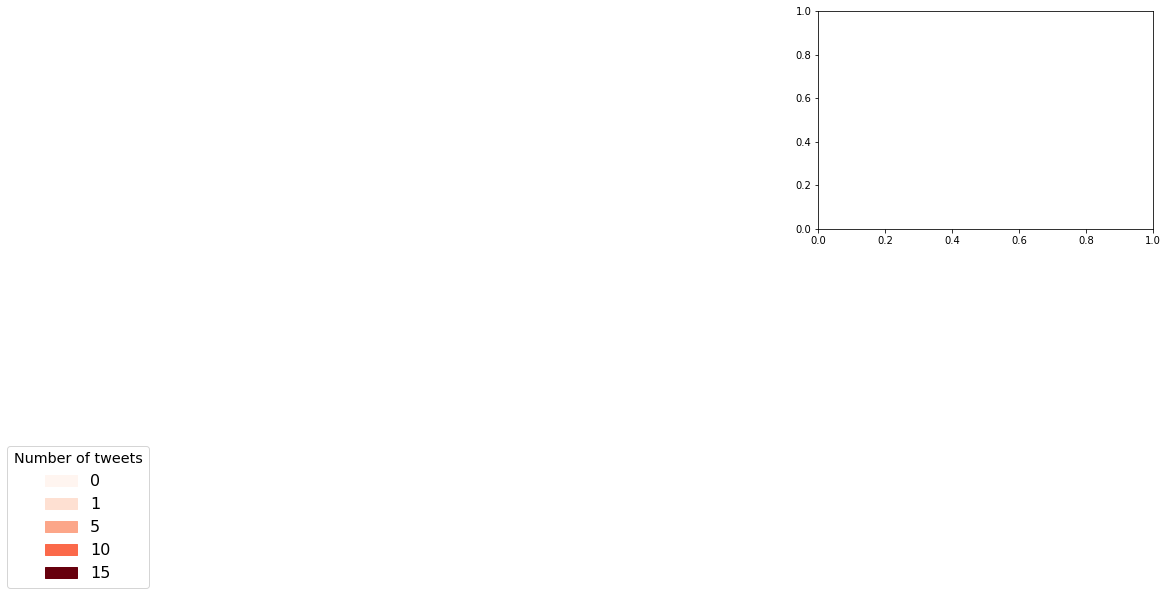

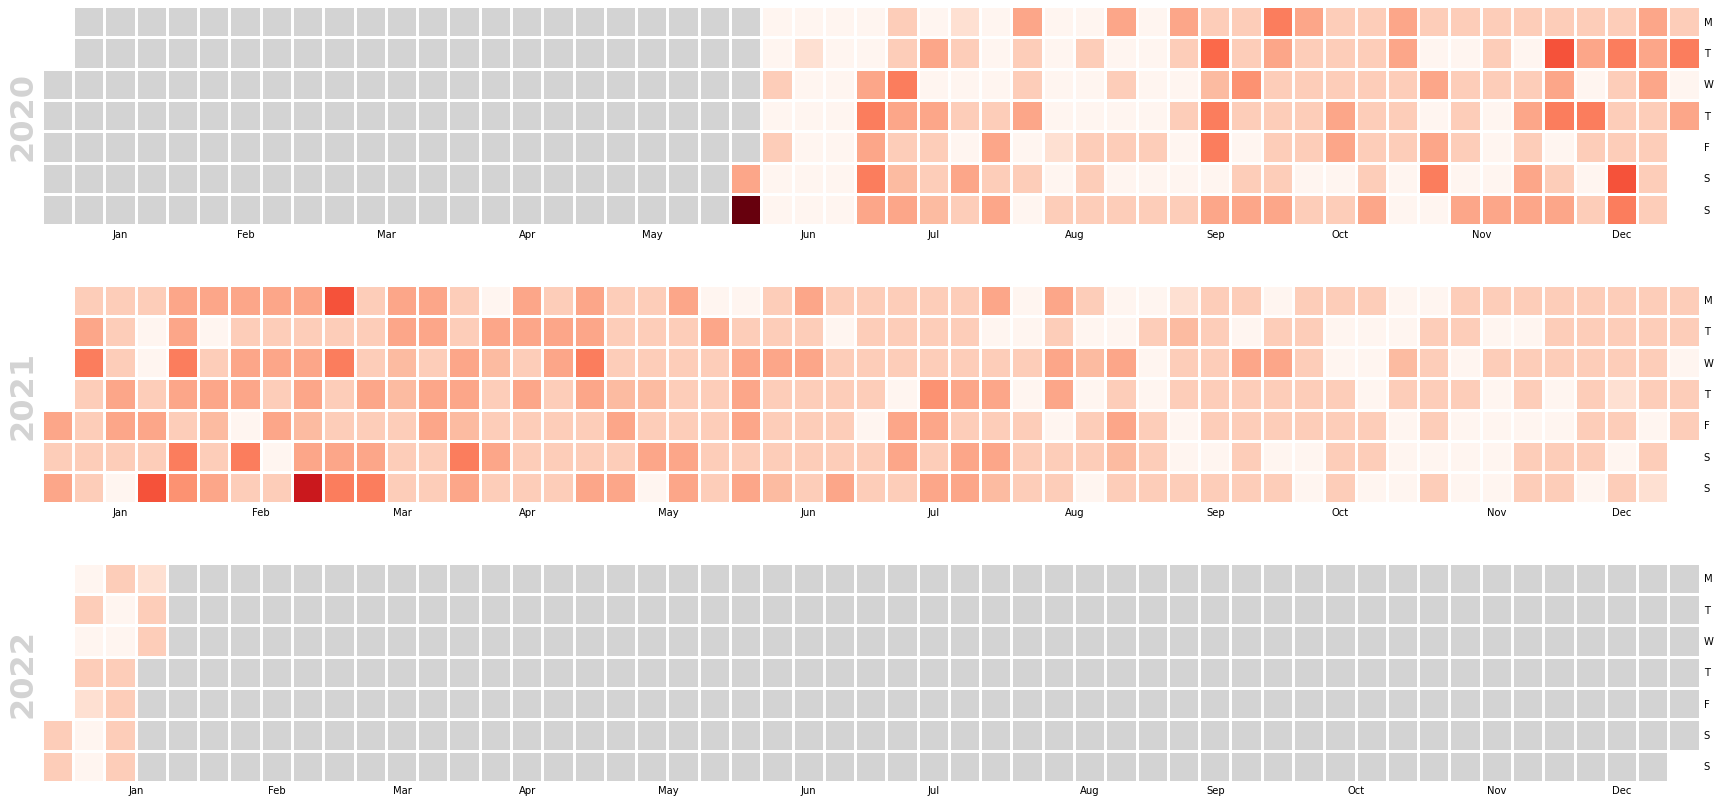

In [191]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#fff5f0', label='0')
red_patch1 = mpatches.Patch(color='#fee0d2', label='1')
red_patch2 = mpatches.Patch(color='#fca689', label='5')
red_patch3 = mpatches.Patch(color='#fb694a', label='10')
red_patch4 = mpatches.Patch(color='#67000d', label='15')
l2 = plt.legend(handles=[red_patch, red_patch1,red_patch2, red_patch3, red_patch4],bbox_to_anchor=(-2,-1), borderaxespad=0, fancybox=True, title="Number of tweets", prop={'size': 16})
plt.setp(l2.get_title(),fontsize='x-large')
calmap.calendarplot(sze,fillcolor='lightgrey',daylabels='MTWTFSS',dayticks=True,
                linewidth=2, fig_kws=dict(figsize=(24, 12)))

<AxesSubplot:>

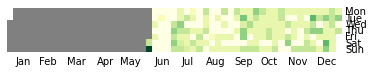

In [147]:
calmap.yearplot(sze, cmap='YlGn', fillcolor='grey',
                linewidth=0)

In [124]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

In [125]:
events

2015-12-11   -0.998662
2014-06-17   -0.136021
2014-11-04   -0.240216
2014-02-07    0.217959
2014-05-05   -0.188949
                ...   
2014-12-12    0.065725
2015-05-05    1.582024
2015-03-21   -0.347094
2015-03-17    0.982412
2015-09-28   -0.627963
Length: 500, dtype: float64